**Case Study-Unsupervised learning**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/Wholesale customers data.csv')

In [3]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [8]:
# Drop 'Channel' and 'Region' columns
df = df.drop(['Channel', 'Region'], axis=1)
print(df.columns)


Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')


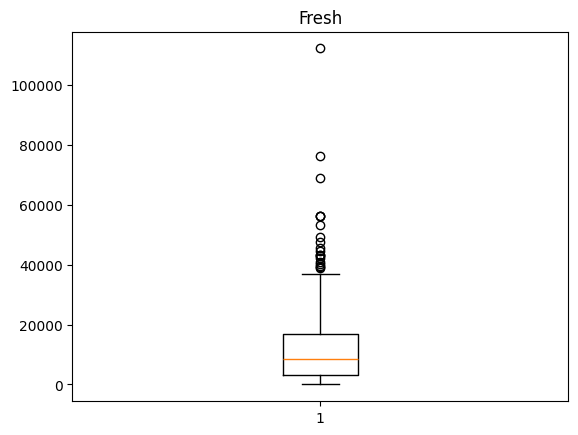

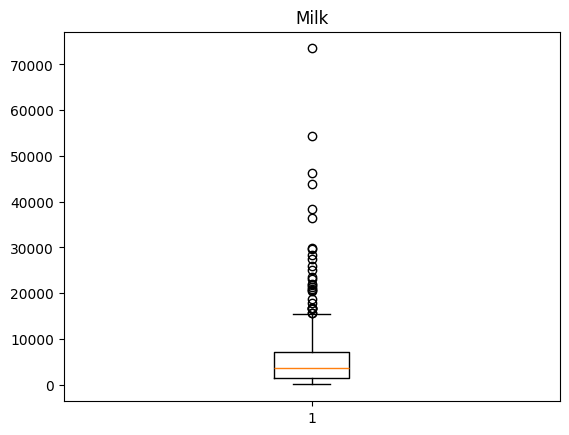

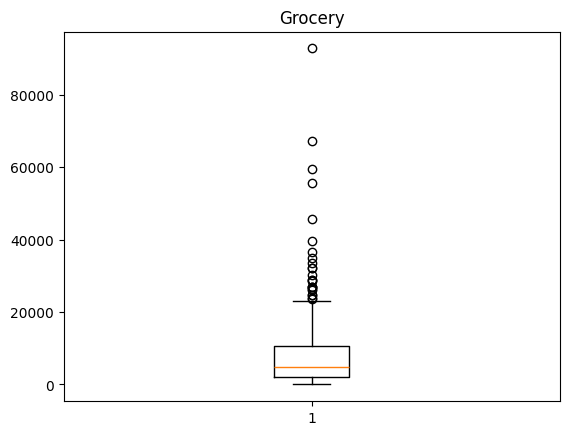

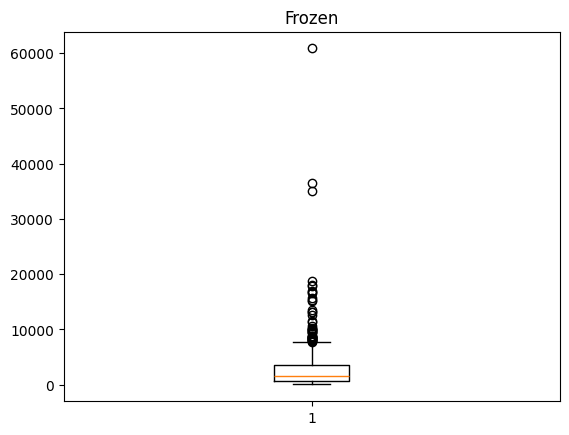

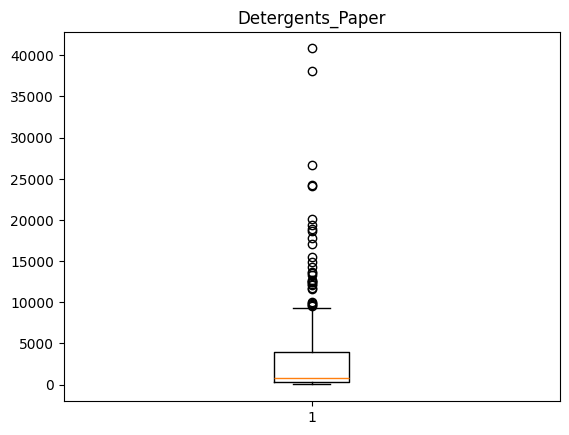

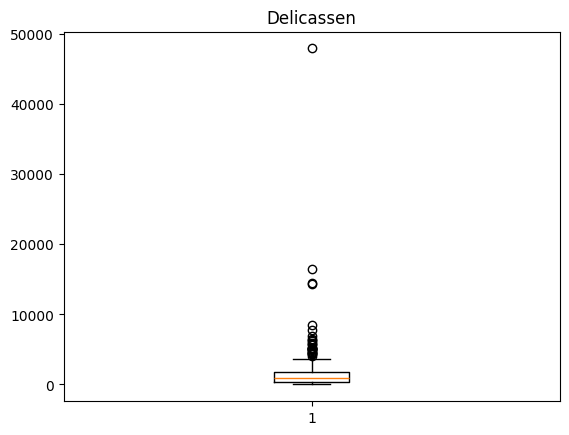

In [9]:
# Outlier detection only for continous numerical column
num_columns =['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']

for i in num_columns:
  plt.figure()
  plt.boxplot(df[i])
  plt.title(i);

In [10]:
# Columns to clip outliers using IQR
columns =['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']


# Dictionary to store outliers before clipping
outliers_dict = {}

for col in columns:
    Q1 = np.percentile(df[col], 25, method='midpoint')
    Q3 = np.percentile(df[col], 75, method='midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    # Collect outliers before clipping
    outliers = []
    for x in df[col]:
        if x < low_lim or x > up_lim:
            outliers.append(x)

    outliers_dict[col] = outliers

    # Clip the column
    df[col] = df[col].clip(lower=low_lim, upper=up_lim)

# Print all detected outliers (before clipping)
for col in columns:
    print(f"\nOutliers in '{col}' before clipping:")
    print(outliers_dict[col])



Outliers in 'Fresh' before clipping:
[43088, 56159, 44466, 40721, 43265, 56082, 76237, 42312, 45640, 112151, 47493, 56083, 53205, 49063, 68951, 40254, 42786, 39679, 38793, 39228]

Outliers in 'Milk' before clipping:
[36423, 20484, 15729, 22044, 54259, 21412, 29892, 38369, 20959, 46197, 73498, 27472, 16729, 15726, 25862, 29627, 43950, 28326, 16599, 23133, 17972, 23527, 20655, 25071, 16784, 18664, 21858, 16687]

Outliers in 'Grocery' before clipping:
[25957, 23998, 55571, 28921, 26866, 59598, 45828, 28540, 92780, 32114, 32034, 28986, 34792, 26870, 24708, 23596, 39694, 36486, 33586, 24773, 26839, 67298, 26316, 30243]

Outliers in 'Frozen' before clipping:
[9408, 10002, 9510, 10643, 8872, 8132, 9735, 8693, 35009, 18028, 8853, 16538, 8195, 8425, 16745, 36534, 7888, 18711, 8321, 11422, 10155, 16919, 10303, 8692, 8366, 12569, 60869, 7849, 11559, 8170, 15601, 9584, 8164, 9927, 8620, 13223, 9806, 17866, 15348, 15082, 13486, 13135]

Outliers in 'Detergents_Paper' before clipping:
[9529, 24171, 

In [11]:
for col in columns:
    print(f"\nAfter clipping '{col}':")
    print(f"Min: {df[col].min()}, Max: {df[col].max()}")



After clipping 'Fresh':
Min: 3, Max: 37657

After clipping 'Milk':
Min: 55.0, Max: 15693.25

After clipping 'Grocery':
Min: 3.0, Max: 23437.25

After clipping 'Frozen':
Min: 25, Max: 7788

After clipping 'Detergents_Paper':
Min: 3.0, Max: 9452.75

After clipping 'Delicassen':
Min: 3.0, Max: 3942.5


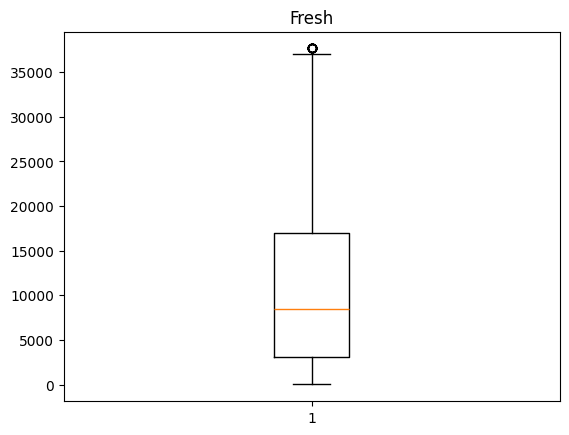

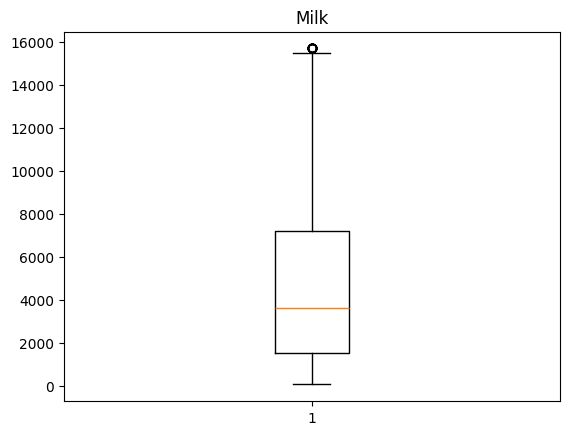

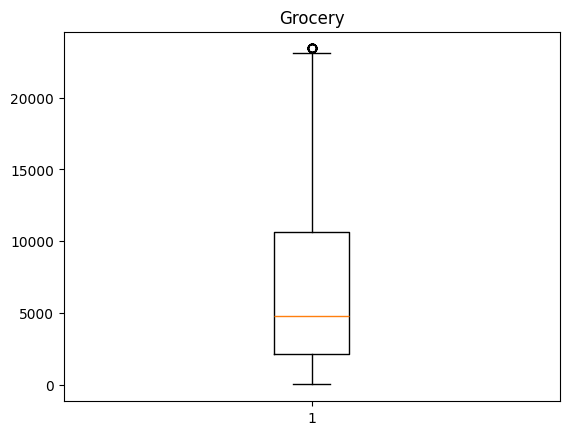

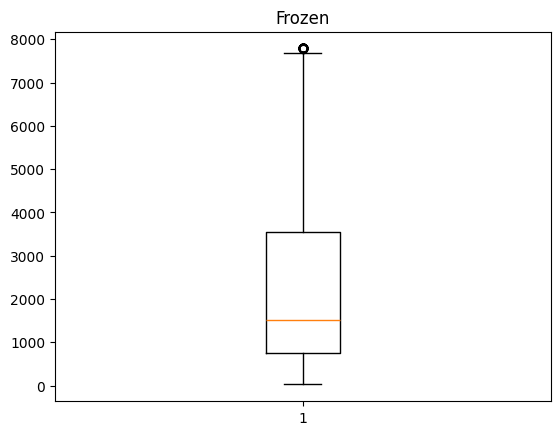

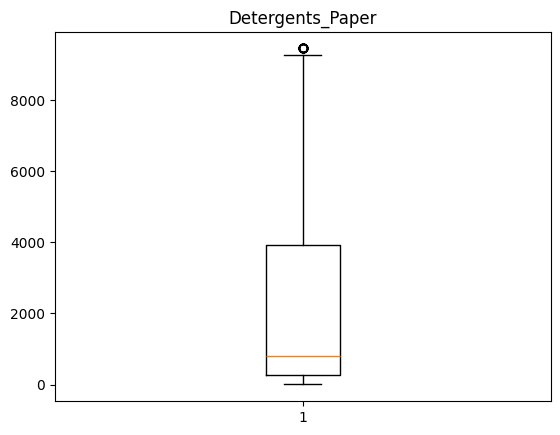

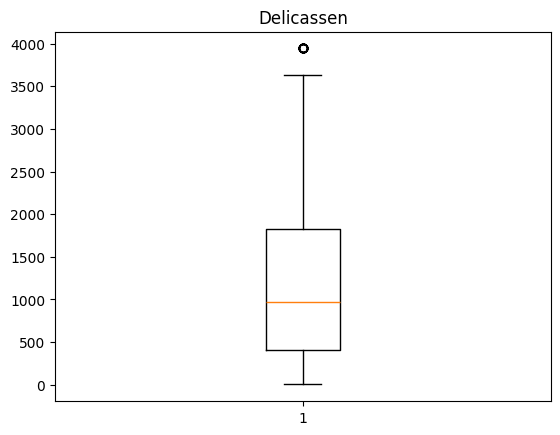

In [12]:
# Outlier detection only for continous numerical column
num_columns =['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']

for i in num_columns:
  plt.figure()
  plt.boxplot(df[i])
  plt.title(i);

Scaling

In [13]:
from sklearn.preprocessing import scale
scale(df)

array([[ 0.12848808,  1.05070305,  0.04901358, -0.95255539,  0.09485531,
         0.06561201],
       [-0.42162165,  1.08583051,  0.35344121, -0.30993862,  0.30519781,
         0.47023744],
       [-0.49063043,  0.8572739 ,  0.06767058, -0.04301189,  0.38097548,
         2.47165522],
       ...,
       [ 0.31100844,  2.38098462,  2.45716963, -0.85998204,  2.39834356,
         0.55430345],
       [-0.10471061, -0.69996757, -0.75930473, -0.61049065, -0.756709  ,
         0.79264446],
       [-0.8401834 , -0.76451998, -0.71713688, -1.01440933, -0.65170765,
        -1.1223978 ]])

In [14]:
x=pd.DataFrame(scale(df),columns=df.columns)

In [15]:
x

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.128488,1.050703,0.049014,-0.952555,0.094855,0.065612
1,-0.421622,1.085831,0.353441,-0.309939,0.305198,0.470237
2,-0.490630,0.857274,0.067671,-0.043012,0.380975,2.471655
3,0.186910,-0.879026,-0.457607,1.617081,-0.641513,0.481323
4,1.103433,0.082189,-0.006047,0.583830,-0.209954,2.471655
...,...,...,...,...,...,...
435,1.798226,1.597004,1.333161,2.191617,-0.751952,0.865625
436,2.577908,-0.825423,-0.981975,0.830831,-0.782195,0.996805
437,0.311008,2.380985,2.457170,-0.859982,2.398344,0.554303
438,-0.104711,-0.699968,-0.759305,-0.610491,-0.756709,0.792644


**Modeling**

KMEANS CLUSTER

In [16]:
df.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [17]:
x=df[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

In [18]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  wcss.append(km.inertia_)

In [19]:
wcss

[80251982938.5874,
 46837842408.45589,
 29123554668.863884,
 22454415460.246655,
 19159287784.134026,
 16380819247.704815,
 14513049108.001104,
 13444324071.46003,
 12511227486.042562,
 11558067489.931303]

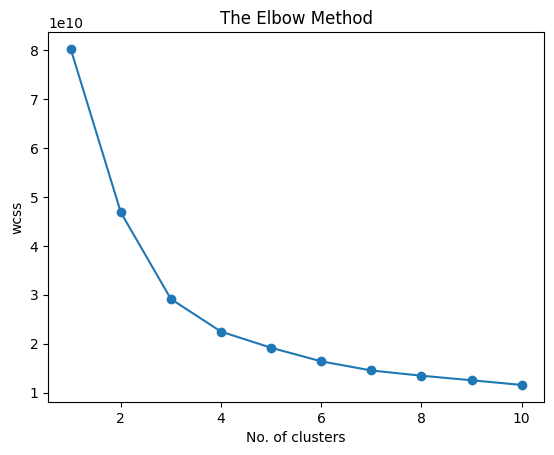

In [20]:
#elbow method
plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

In [21]:
km=KMeans(n_clusters=3,n_init=10)
km.fit(x)


KMeans(n_clusters=3, n_init=10)

In [22]:
cluster_labels=km.predict(x)

In [23]:
cluster_labels

array([2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 0,
       2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 1,
       2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2, 0,
       2, 0, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       1, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0,
       2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2,
       2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 1,

In [24]:
pd.Series(cluster_labels).value_counts()

,count
2,225
1,112
0,103


In [25]:
df['cluster_labels']=cluster_labels

In [26]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_labels
0,12669,9656.0,7561.0,214,2674.0,1338.0,2
1,7057,9810.0,9568.0,1762,3293.0,1776.0,0
2,6353,8808.0,7684.0,2405,3516.0,3942.5,2
3,13265,1196.0,4221.0,6404,507.0,1788.0,2
4,22615,5410.0,7198.0,3915,1777.0,3942.5,1


In [27]:
colors=['r','g','b']

In [28]:
df[df['cluster_labels']==0]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_labels
1,7057,9810.00,9568.00,1762,3293.00,1776.0,0
9,6006,11093.00,18881.00,1159,7425.00,2098.0,0
10,3366,5403.00,12974.00,4400,5977.00,1744.0,0
16,1020,8816.00,12121.00,134,4508.00,1080.0,0
28,4113,15693.25,23437.25,1158,8604.00,3942.5,0
...,...,...,...,...,...,...,...
418,660,8494.00,18622.00,133,6740.00,776.0,0
420,4456,5266.00,13227.00,25,6818.00,1393.0,0
426,13134,9347.00,14316.00,3141,5079.00,1894.0,0
430,3097,4230.00,16483.00,575,241.00,2080.0,0


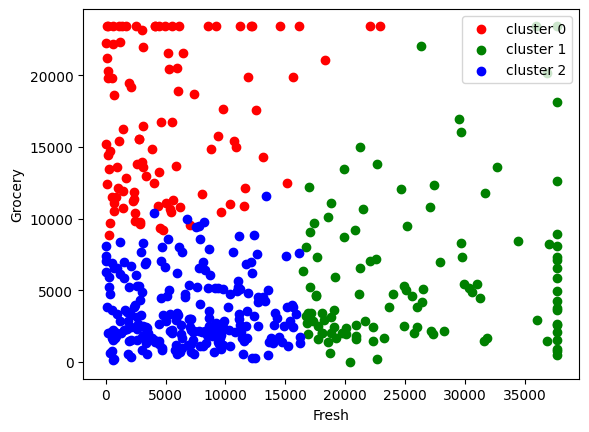

In [29]:
colors=['r','g','b']
for i in range(max(cluster_labels)+1):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['Fresh'],cluster_data['Grocery'],c=colors[i],label=f'cluster {i}')
plt.legend()
plt.xlabel('Fresh')
plt.ylabel('Grocery')

plt.show()

In [30]:
km.cluster_centers_# centroids

array([[ 5164.61165049, 10042.82281553, 16606.94660194,  1470.90291262,
         6745.11650485,  1512.38349515],
       [25994.59821429,  4630.89955357,  6026.78125   ,  3802.47321429,
         1290.59375   ,  1680.20535714],
       [ 6907.84444444,  2972.39333333,  3551.76444444,  2339.59555556,
          953.08444444,   948.93777778]])

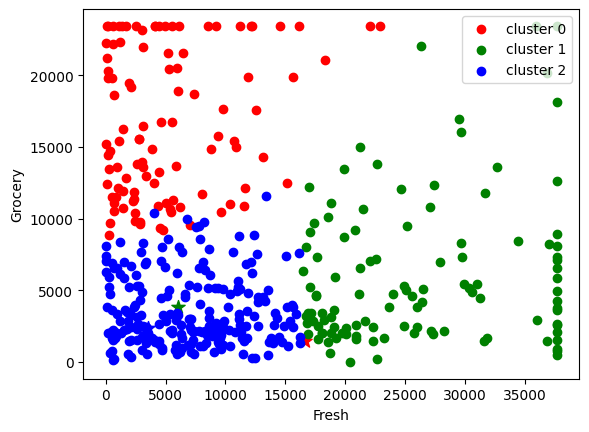

In [31]:
colors=['r','g','b']
for i in range(max(cluster_labels)+1):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['Fresh'],cluster_data['Grocery'],c=colors[i],label=f'cluster {i}')
  plt.scatter(km.cluster_centers_[i][2],km.cluster_centers_[i][3],marker='*',c=colors[i],s=100)
plt.legend()
plt.xlabel('Fresh')
plt.ylabel('Grocery')
#centroids of last two columns
plt.show()

In [32]:
#sillhoette score
from sklearn.metrics import silhouette_score
#kmeans
sil_score=silhouette_score(x,cluster_labels)
print(sil_score)

0.41157048386221506


Agglomerative Hierarchical Clustering


In [33]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

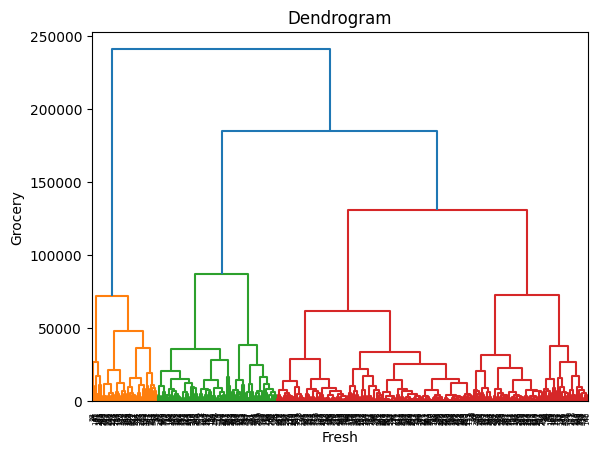

In [34]:
#optimum no of cluster Dendrogram
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

In [36]:
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
x

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656.0,7561.00,214,2674.00,1338.0
1,7057,9810.0,9568.00,1762,3293.00,1776.0
2,6353,8808.0,7684.00,2405,3516.00,3942.5
3,13265,1196.0,4221.00,6404,507.00,1788.0
4,22615,5410.0,7198.00,3915,1777.00,3942.5
...,...,...,...,...,...,...
435,29703,12051.0,16027.00,7788,182.00,2204.0
436,37657,1431.0,764.00,4510,93.00,2346.0
437,14531,15488.0,23437.25,437,9452.75,1867.0
438,10290,1981.0,2232.00,1038,168.00,2125.0


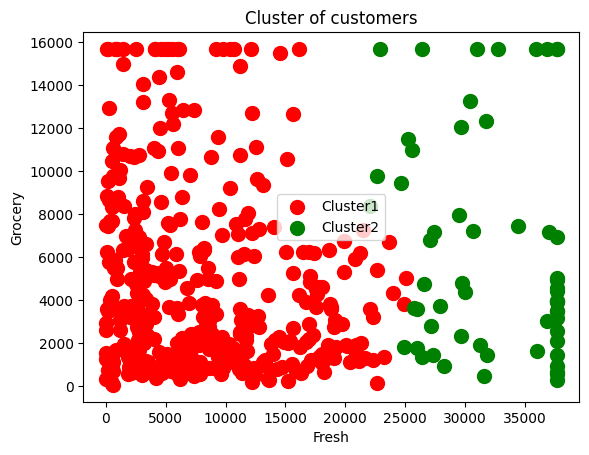

In [38]:
# Corrected plotting code using .iloc
plt.scatter(x[y_hc==0].iloc[:,0],x[y_hc==0].iloc[:,1],s=100,c='red',label='Cluster1')
plt.scatter(x[y_hc==1].iloc[:,0],x[y_hc==1].iloc[:,1],s=100,c='green',label='Cluster2')
plt.title('Cluster of customers')
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.legend()
plt.show()


In [39]:
#ahc
sil=silhouette_score(x,y_hc)
print(sil)

0.4670726333990123


closer to 1 ,so not bad

In [40]:
df.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_labels
Fresh,1.000000,-0.037921,-0.098326,0.355521,-0.225790,0.259387,-0.099010
Milk,-0.037921,1.000000,0.781188,-0.036871,0.691174,0.372230,-0.622401
Grocery,-0.098326,0.781188,1.000000,-0.137375,0.877591,0.290126,-0.756529
Frozen,0.355521,-0.036871,-0.137375,1.000000,-0.239201,0.237216,0.079450
Detergents_Paper,-0.225790,0.691174,0.877591,-0.239201,1.000000,0.161208,-0.729615
Delicassen,0.259387,0.372230,0.290126,0.237216,0.161208,1.000000,-0.248649
cluster_labels,-0.099010,-0.622401,-0.756529,0.079450,-0.729615,-0.248649,1.000000


PCA

In [41]:
from sklearn.decomposition import PCA
pca=PCA()

In [42]:
pc_array=pca.fit_transform(x)

In [43]:
pc_array

array([[ 6.74664397e+02,  2.83263514e+03,  2.09229156e+03,
        -3.93829075e+03, -1.57904823e+01, -1.47922411e+02],
       [-5.03913423e+03,  3.61036307e+03,  2.59015862e+03,
        -1.73193163e+03, -2.04567813e+02,  1.89321396e+02],
       [-5.27835748e+03,  1.66777633e+03,  3.05732371e+03,
        -1.13152037e+03,  3.54132820e+02,  2.53116297e+03],
       ...,
       [-1.05903183e+03,  2.07576070e+04, -5.04961546e+02,
        -1.82492847e+03,  5.18125746e+02, -2.38451996e+02],
       [ 6.89472409e+01, -6.28896906e+03, -6.25372384e+02,
        -1.24647260e+03, -6.71468606e+02,  1.23404558e+03],
       [-7.43946040e+03, -7.66100167e+03, -1.17064115e+03,
        -1.48923282e+03, -5.10244126e+02, -5.41065202e+02]])

In [44]:
pc_array=pd.DataFrame(pc_array,columns=['pc1','pc2','pc3','pc4','pc5','pc6'])

In [45]:
pc_array


,pc1,pc2,pc3,pc4,pc5,pc6
0,674.664397,2832.635138,2092.291564,-3938.290751,-15.790482,-147.922411
1,-5039.134234,3610.363071,2590.158618,-1731.931625,-204.567813,189.321396
2,-5278.357481,1667.776330,3057.323705,-1131.520370,354.132820,2531.162969
3,3154.682005,-4482.141745,388.856848,4022.527815,-215.846370,421.386293
4,11211.667561,2258.525507,595.598256,431.135502,-454.629695,2194.306699
...,...,...,...,...,...,...
435,16755.821590,13211.166083,4059.058932,2797.765978,-3854.050183,-1412.612133
436,27358.947586,-2461.050953,-779.413893,-214.753664,1037.228500,895.565780
437,-1059.031831,20757.606965,-504.961546,-1824.928465,518.125746,-238.451996
438,68.947241,-6288.969057,-625.372384,-1246.472599,-671.468606,1234.045579


In [46]:
pca1=PCA(n_components=2)
pc_array1=pca1.fit_transform(x)

In [47]:
pc_array1=pd.DataFrame(pc_array1,columns=['pc1','pc2'])

In [48]:
pc_array1

,pc1,pc2
0,674.664397,2832.635138
1,-5039.134234,3610.363071
2,-5278.357481,1667.776330
3,3154.682005,-4482.141745
4,11211.667561,2258.525507
...,...,...
435,16755.821590,13211.166083
436,27358.947586,-2461.050953
437,-1059.031831,20757.606965
438,68.947241,-6288.969057


In [49]:
pc_array1.corr().round()

,pc1,pc2
pc1,1.0,0.0
pc2,0.0,1.0


In [50]:
explained_variance=pca.explained_variance_ratio_#varianceexplained by each component
explained_variance

array([0.58574412, 0.34086915, 0.03487056, 0.02542001, 0.00843542,
       0.00466073])

Text(0, 0.5, 'Explained Variance')

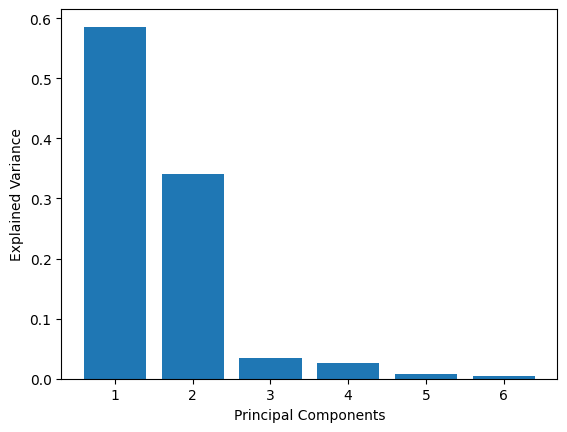

In [51]:
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance")

In [52]:
pc_array1.shape

(440, 2)

DB Scan Clustering

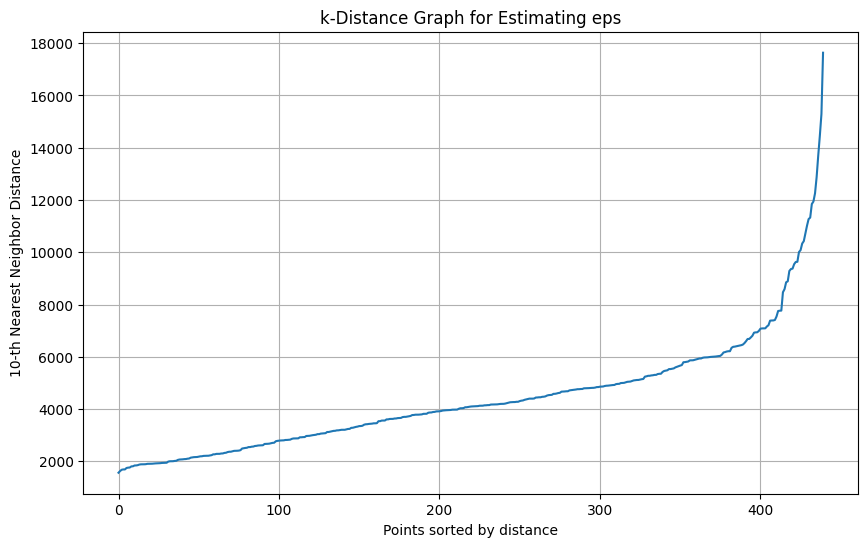

In [53]:
from sklearn.neighbors import NearestNeighbors

min_samples = 10
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)

# Sort the distances to the k-th nearest neighbor
k_distances = np.sort(distances[:, -1])

# Plot the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.title('k-Distance Graph for Estimating eps')
plt.grid(True)
plt.show()


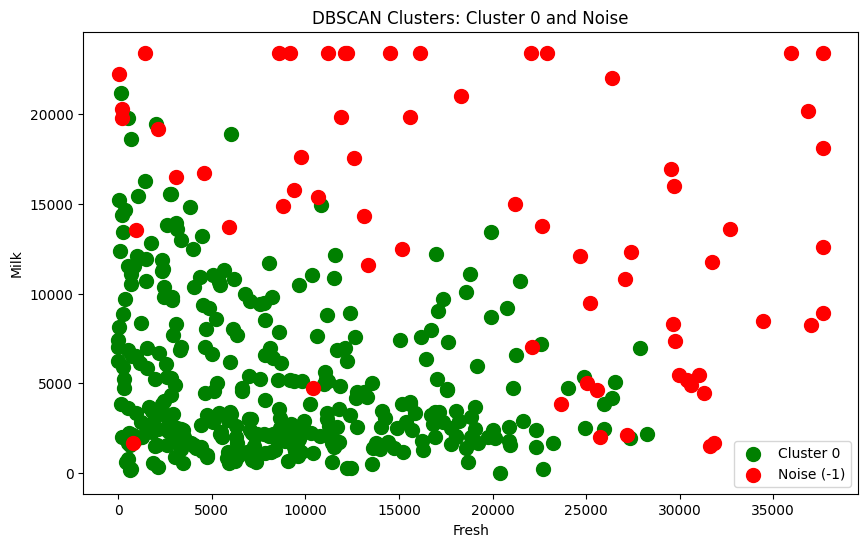

In [54]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Fit DBSCAN
model = DBSCAN(eps=5000, min_samples=10)
y_pred = model.fit_predict(x)

# Create the figure
plt.figure(figsize=(10, 6))

# Plot cluster 0
plt.scatter(x[y_pred == 0].iloc[:, 0], x[y_pred == 0].iloc[:, 2],
            c='green', label='Cluster 0', s=100)

# Plot noise (-1)
plt.scatter(x[y_pred == -1].iloc[:, 0], x[y_pred == -1].iloc[:, 2],
            c='red', label='Noise (-1)', s=100)

# Add labels and legend
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('DBSCAN Clusters: Cluster 0 and Noise')
plt.legend()
plt.show()


As observed, DBSCAN is not well-suited for this type of data distribution.